In [43]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import ensemble
import time

In [44]:
lfw = datasets.fetch_lfw_people(min_faces_per_person=100, resize = 0.4)

In [45]:
lfw.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [46]:
lfw.data.shape

(1140, 1850)

In [47]:
lfw.images.shape

(1140, 50, 37)

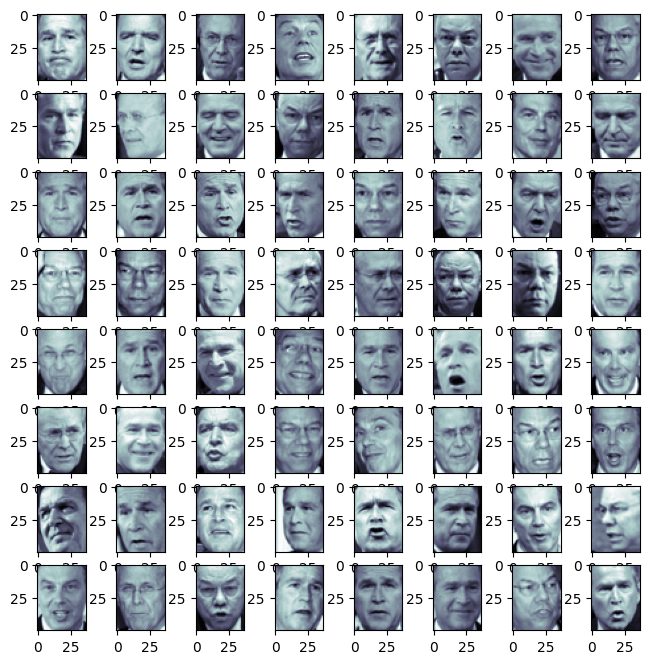

In [48]:
fig = plt.figure(figsize=(8, 8))
for i in range(64):
	ax = fig.add_subplot(8, 8, i + 1)
	ax.imshow(lfw.images[i], cmap=plt.cm.bone)
plt.show()

In [49]:
x, y = lfw.data, lfw.target
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)
pca_oliv = PCA()
pca_oliv.fit(x_train)
pca_oliv.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': None,
 'n_oversamples': 10,
 'power_iteration_normalizer': 'auto',
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [50]:
k = 0
total = 0
while total < 0.99:
    total += pca_oliv.explained_variance_ratio_[k]
    k = k + 1
k

357

In [51]:
pca_lfw = PCA(n_components = k, whiten = True)
x_transformed = pca_lfw.fit_transform(x_train)
x_transformed.shape

(855, 357)

In [52]:
x_approx = pca_lfw.inverse_transform(x_transformed)
x_approx = x_approx.reshape(855, 50, 37)

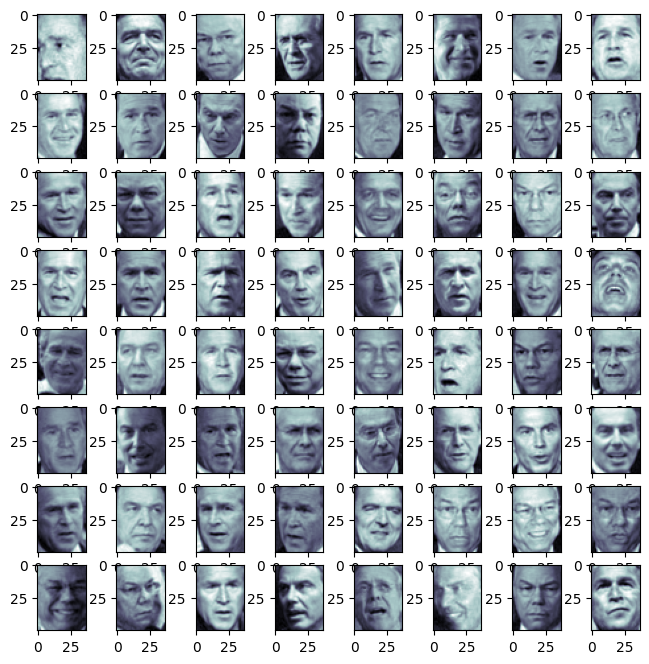

In [53]:
fig = plt.figure(figsize=(8, 8))
for i in range(64):
	ax = fig.add_subplot(8, 8, i + 1)
	ax.imshow(x_approx[i], cmap=plt.cm.bone)
plt.show()

In [42]:
pca_lfw.components_.shape
eigenv = pca_lfw.components_.reshape(357, 50, 37)

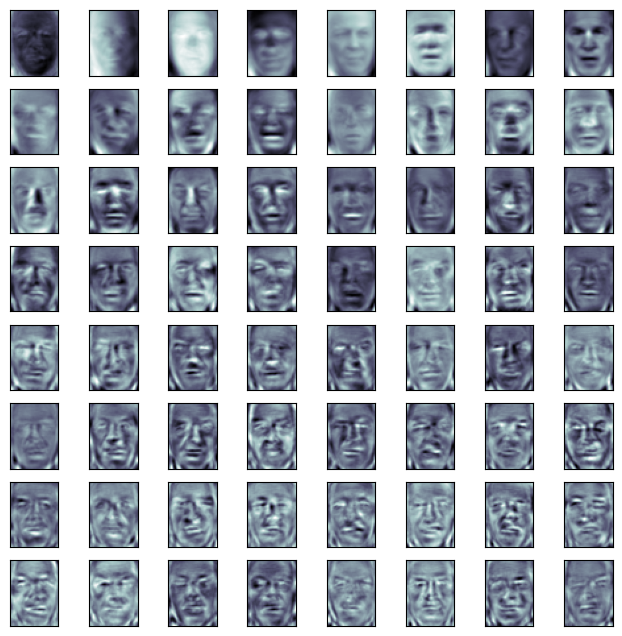

In [54]:
fig = plt.figure(figsize=(8, 8))
for i in range(64):
	ax = fig.add_subplot(8, 8, i + 1, xticks = [], yticks = [])
	ax.imshow(eigenv[i], cmap=plt.cm.bone)
plt.show()

In [55]:
x_train_pca = x_transformed
x_test_pca = pca_lfw.transform(x_test)

In [60]:
rf = ensemble.RandomForestClassifier()
start = time.time()
rf.fit(x_train, y_train)
print(time.time() - start)
y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

2.937589168548584
              precision    recall  f1-score   support

           0       0.80      0.66      0.72        61
           1       0.83      0.14      0.24        36
           2       0.56      0.99      0.71       122
           3       1.00      0.03      0.06        31
           4       0.82      0.26      0.39        35

    accuracy                           0.62       285
   macro avg       0.80      0.42      0.43       285
weighted avg       0.72      0.62      0.54       285

[[ 40   0  21   0   0]
 [  7   5  24   0   0]
 [  1   0 121   0   0]
 [  1   1  26   1   2]
 [  1   0  25   0   9]]


In [61]:
from sklearn.metrics import confusion_matrix

# Etiquetas verdaderas
y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]

# Etiquetas predichas por el modelo
y_pred = [1, 0, 1, 1, 1, 0, 0, 1, 1, 0]

# Calcular la matriz de confusión
confusion = confusion_matrix(y_true, y_pred)

print(confusion)


[[3 2]
 [1 4]]
